importing libraries

In [4]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from numba import njit, prange
import image_processing
import unittest

In [5]:
class TestTemporalDamageFiltering(unittest.TestCase):
    def test_long_lasting_damaged_pixels(self):
    
        num_frames = 20
        width, height = 100, 80
        damaged_pixel_count = 30
        duration = 10
        consecutive_threshold = 2

        frames, _ = image_processing.create_temporal_test_video(
            num_frames,
            width,
            height,
            damaged_pixel_count = damaged_pixel_count,
            duration = duration,
            background_intensity = 0
        )

        counts = image_processing.detect_damaged_pixels(
            frames,
            plot = False,
            consecutive_threshold = consecutive_threshold
        )

        self.assertTrue(
            all(c == 0 for c in counts),
            f"expected zero counts when duration > {consecutive_threshold}, got {counts}"
        )

if __name__ == "__main__":
    unittest.main(argv = [""], exit = False)

.
----------------------------------------------------------------------
Ran 1 test in 0.050s

OK


Removed 0 frames due to high optical flow


Removed 88 frames due to high optical flow


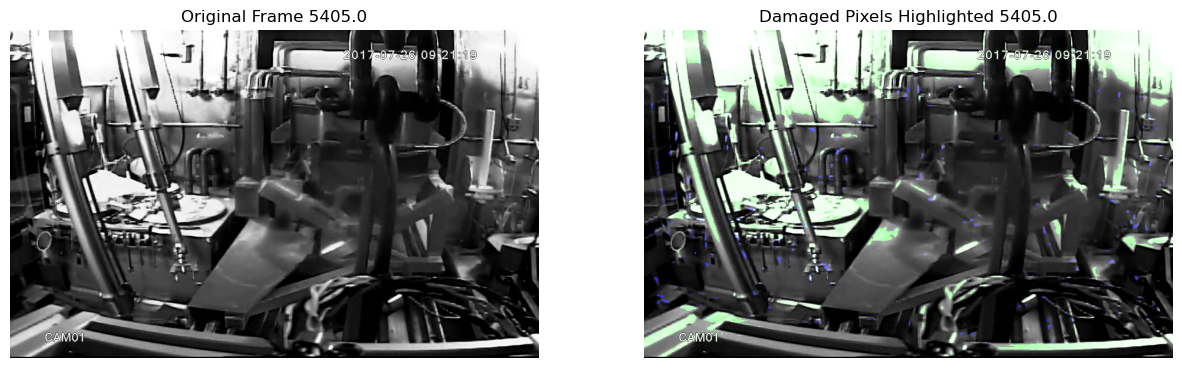

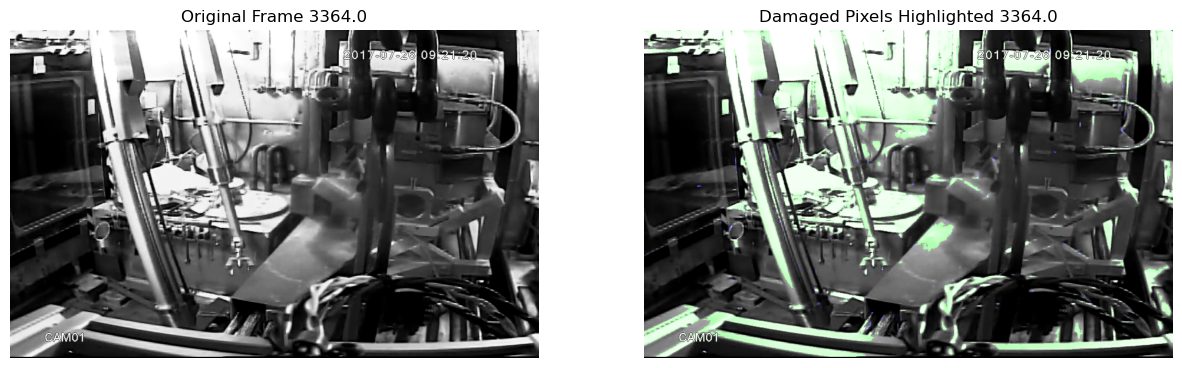

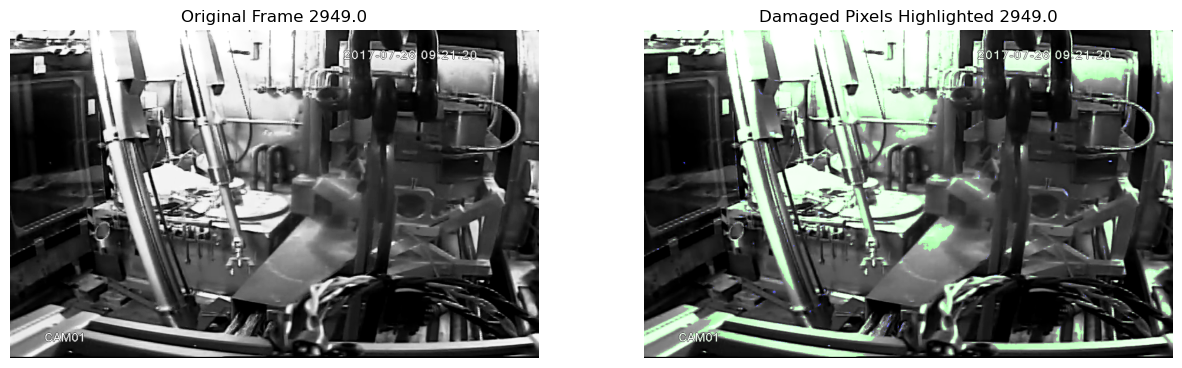

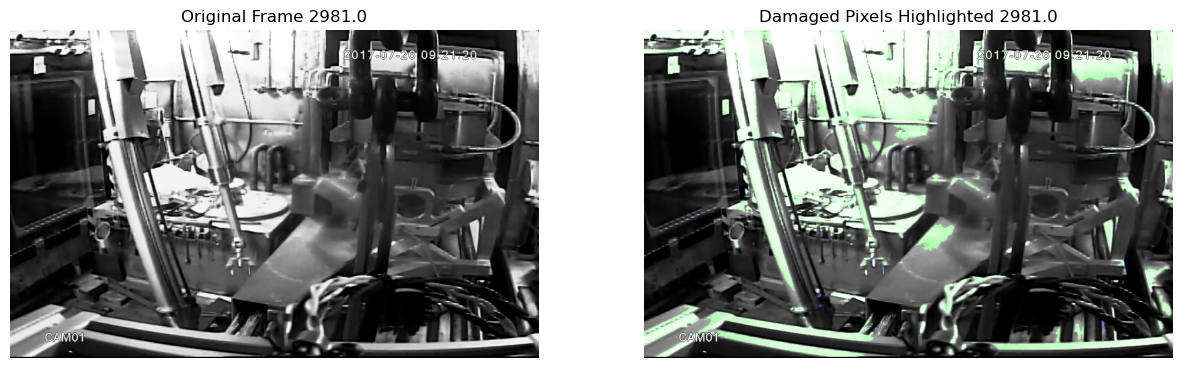

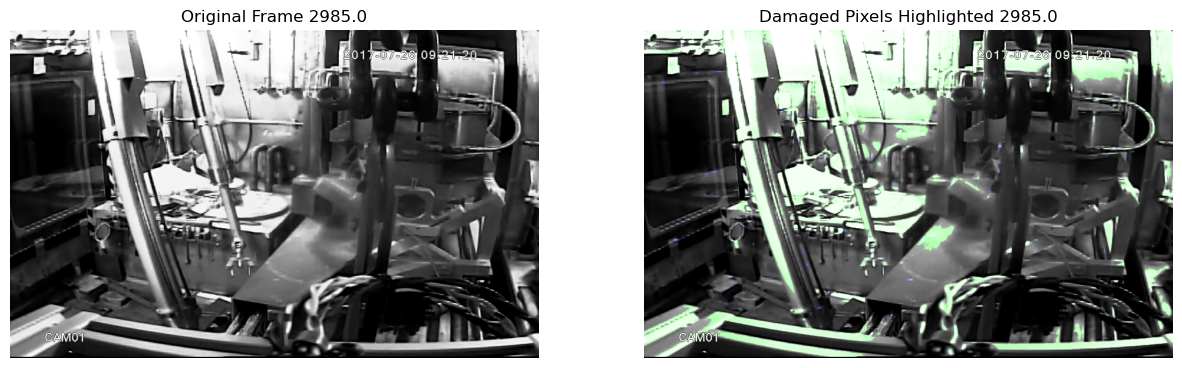

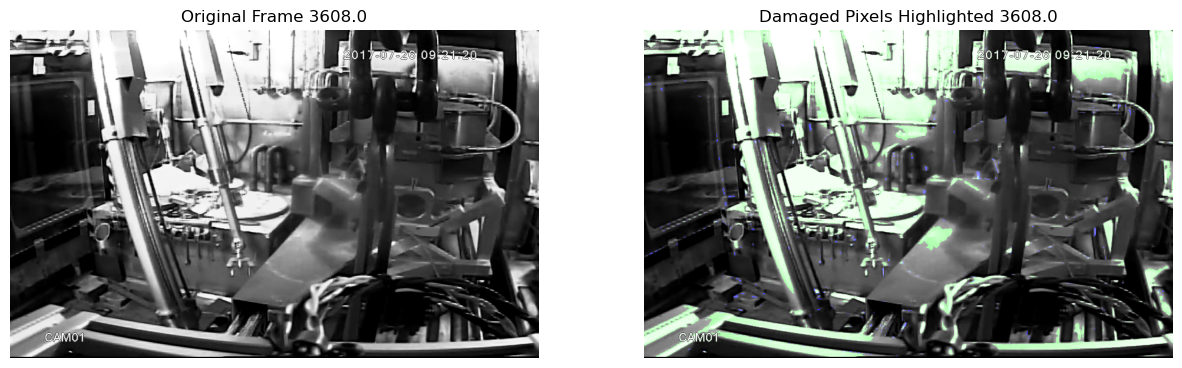

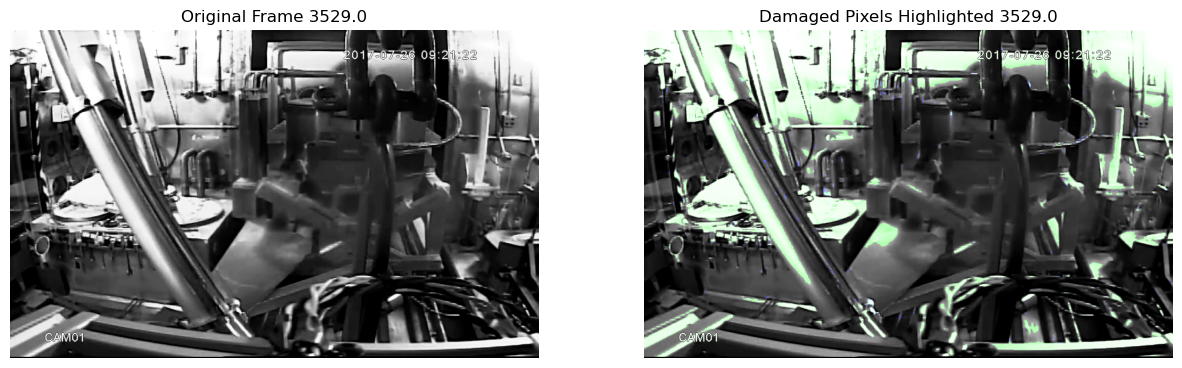

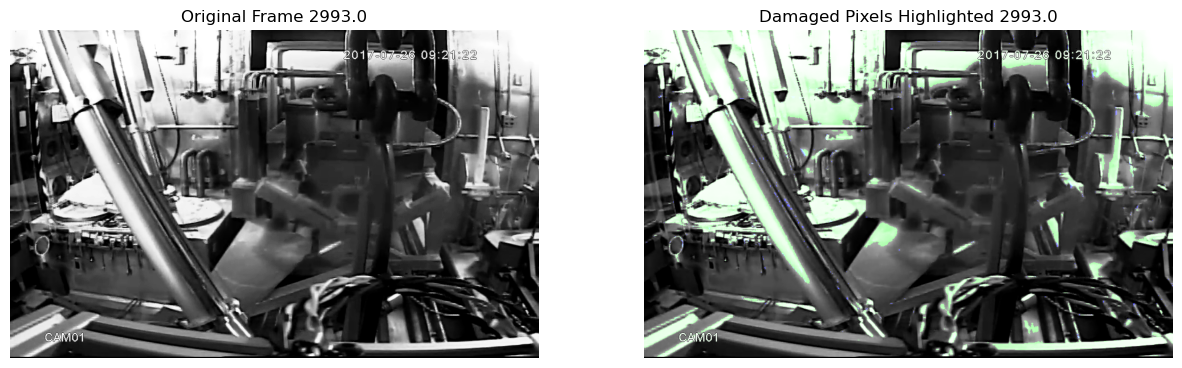

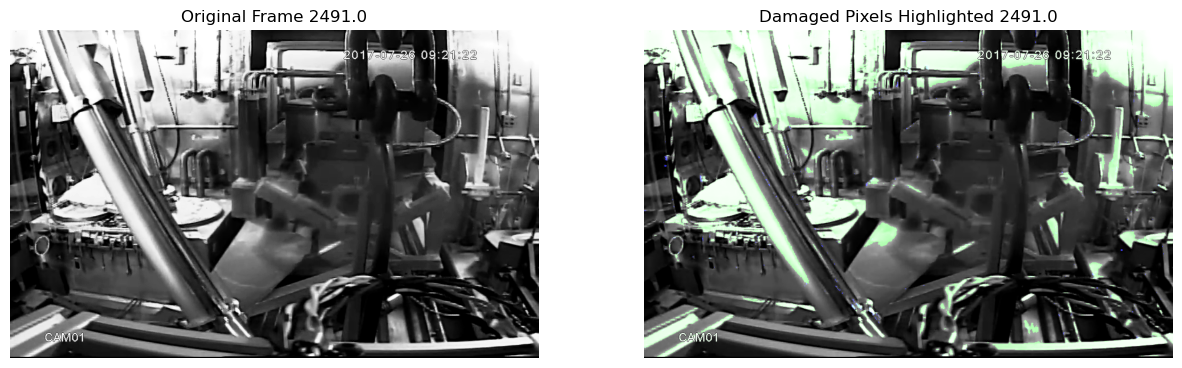

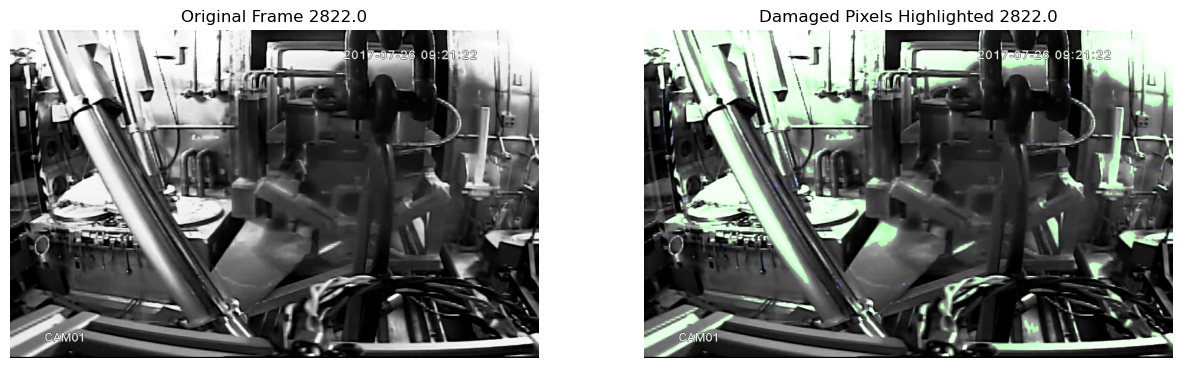

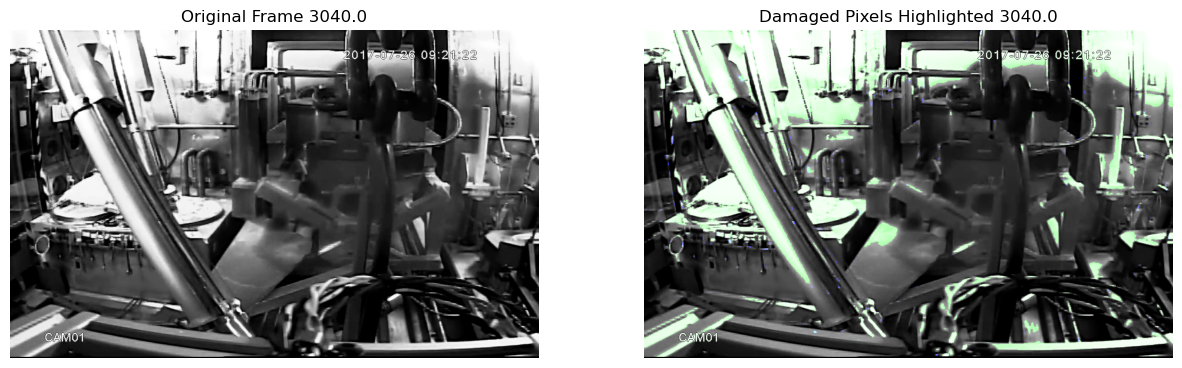

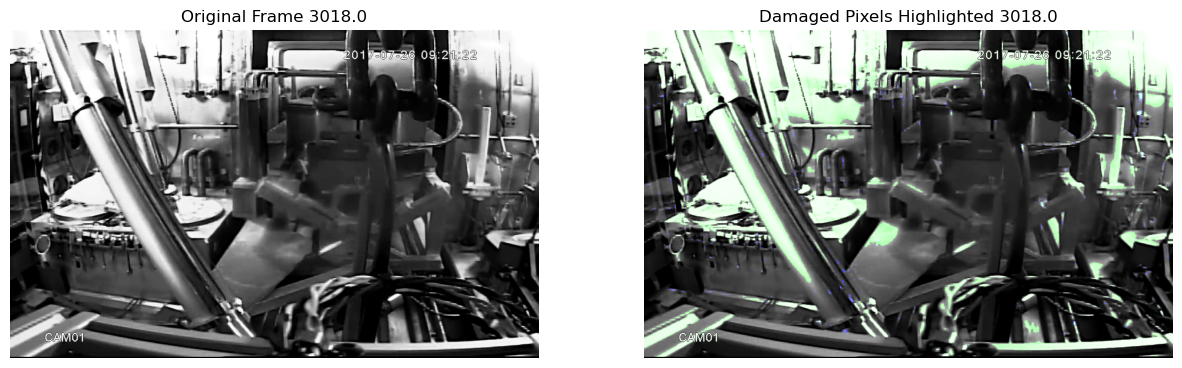

IndexError: list index out of range

In [6]:
frame_threshold_low = 86200
frame_threshold_high = 86300

video_filename = "11_01_H_170726081325.avi"
frames = image_processing.load_video_frames(video_filename, frames_start = frame_threshold_low, frames_end = frame_threshold_high)
damaged_pixels = image_processing.detect_damaged_pixels(frames, plot = True, consecutive_threshold = 2, brightness_threshold = 150, flow_threshold = 1.0, number_of_plots=20)
     